In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [25]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)

# Question 1
Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [26]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


# Question 2
Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [27]:
df.drop(columns=["id", "Unnamed: 0"], axis=1, inplace=True)
statistical_summary = df.describe()
print(statistical_summary)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [28]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [29]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [30]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [31]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Question 3
Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [32]:
unique_floors_count = df['floors'].value_counts().to_frame()
unique_floors_count

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


# Question 4
Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.

<Axes: xlabel='waterfront', ylabel='price'>

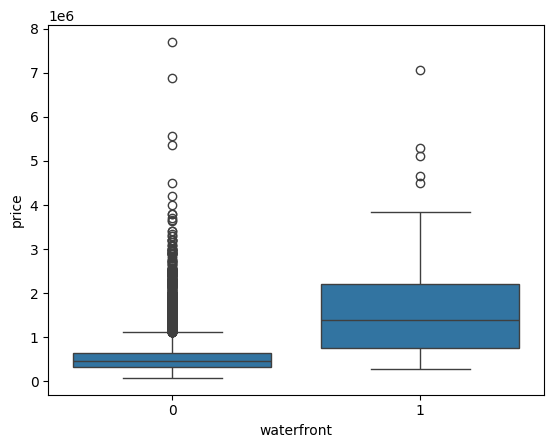

In [33]:
sns.boxplot(x="waterfront", y="price", data=df)

# Question 5
Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project.

<Axes: xlabel='sqft_above', ylabel='price'>

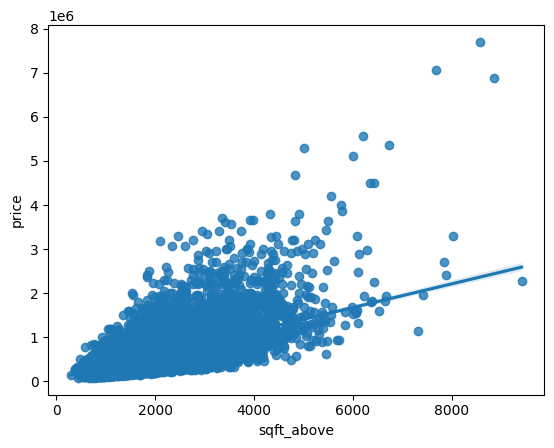

In [34]:
sns.regplot(x="sqft_above", y="price", data=df)

In [35]:
numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()

price_correlations = correlation_matrix['price'].sort_values(ascending=False)

most_correlated_feature = price_correlations.index[1]

print(f"The feature most correlated with price is: {most_correlated_feature}")

The feature most correlated with price is: sqft_living


In [36]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

# Question 6
Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [37]:
X_1 = df[['sqft_living']]
lm_1 = LinearRegression()
lm.fit(X_1,Y)
lm.score(X_1, Y)

0.4928532179037931

# Question 7
Fit a linear regression model to predict the 'price' using the list of features:

In [38]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [39]:
lm_2 = LinearRegression()
Z = df[features]
lm_2.fit(Z,Y)
lm_2.score(Z, Y)

0.6576722447699446

# Question 8
Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [40]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [41]:
pipe=Pipeline(Input)

pipe.fit(Z,Y)

pipe.score(Z,Y)

0.7513410648797747

In [42]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


# Question 9
Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [43]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6478759163939112


# Question 10
Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.

In [44]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.700274426790608
